# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the local file using python code

In [2]:
from google.colab import files
uploaded = files.upload()

Saving df_scaled.csv to df_scaled.csv


# Load the dataset

In [3]:
df = pd.read_csv('df_scaled.csv')
df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Outlet_No.
0,10107222.0,Batticaloa,-0.347692,-0.308787,0.520598,1,1
1,10149531.0,Batticaloa,-0.347612,-0.211738,0.784676,1,1
2,10389466.0,Batticaloa,-0.347496,-0.367402,0.423406,1,1
3,10596077.0,Batticaloa,-0.347496,-0.271276,0.682146,1,1
4,10244123.0,Batticaloa,-0.347398,-0.301495,0.633288,1,1


# Data types

In [4]:
df.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,int64
Outlet_No.,int64


# Assigning input and output variables

In [13]:
ind_cols = ['luxury_sales','dry_sales','fresh_sales','Outlet_No.']
x = df[ind_cols]
y = df.cluster_catgeory

In [14]:
x

,luxury_sales,dry_sales,fresh_sales,Outlet_No.
0,-0.347692,0.520598,-0.308787,1
1,-0.347612,0.784676,-0.211738,1
2,-0.347496,0.423406,-0.367402,1
3,-0.347496,0.682146,-0.271276,1
4,-0.347398,0.633288,-0.301495,1
...,...,...,...,...
774142,0.212166,0.645924,-0.399838,20
774143,0.212166,0.607649,-0.440558,20
774144,-0.713610,-0.415914,0.402667,20
774145,0.941435,1.127004,-0.230859,20


In [15]:
y

,cluster_catgeory
0,1
1,1
2,1
3,1
4,1
...,...
774142,4
774143,4
774144,2
774145,4


# Data Split (70/30) and Dimension

In [8]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print('Whole Data shape', df.shape)
print('X1_train shape', X1_train.shape)
print('X1_test shape', X1_test.shape)

Whole Data shape (774147, 7)
X1_train shape (541902, 4)
X1_test shape (232245, 4)


# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X1_train, Y_train)
Y_pred=logreg.predict(X1_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix

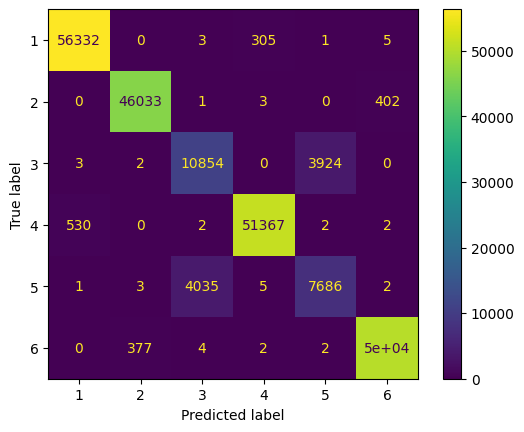

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

# Model Evaluation

In [11]:
#Import the function to calculate accuracy score
from sklearn.metrics import accuracy_score
# Apply the function to find the correct predictions
accuracy = accuracy_score(Y_test,Y_pred)
# Display the accuracy
print ('The Logistic Regression Model Accuracy:',accuracy)

The Logistic Regression Model Accuracy: 0.9585954487717712


# Classification Report

In [12]:
#to get the classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     56646
           2       0.99      0.99      0.99     46439
           3       0.73      0.73      0.73     14783
           4       0.99      0.99      0.99     51903
           5       0.66      0.66      0.66     11732
           6       0.99      0.99      0.99     50742

    accuracy                           0.96    232245
   macro avg       0.89      0.89      0.89    232245
weighted avg       0.96      0.96      0.96    232245

